In [ ]:

def find(i):
 if ptr[i]<0:
  return i
 else:
  ptr[i] = find(ptr[i]) # root 를 parent 로 지 정
  return ptr[i]
# return find(ptr[i])



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
L = 256
Kmax = 4
N = L**2
ptr = np.empty(N,int)

big_list = [0]
def find(i):
 if ptr[i]<0:
  return i
 else:
  ptr[i] = find(ptr[i]) # root 를 parent 로 지 정
  return ptr[i]
# return find(ptr[i])

def union(r1,r2,big):
 if r2 != r1:
  if(ptr[r1]>ptr[r2]): # 두 번 째 트 리 가 더 크 면
    ptr[r2] += ptr[r1] # 첫 번 째 트 리 를 병 합
    ptr[r1] = r2
    r1 = r2
  else:
    ptr[r1] += ptr[r2]
    ptr[r2] = r1
  if -ptr[r1]>big: # 기 존 의 big 보 다 크 면 갱 신
    big = -ptr[r1]
  big_list.append(big/N)
 return r1, r2, big


K = np.empty(N, int)
for i in range(N):
 K[i] = Kmax
nn = np.empty([N,Kmax], int)
for i in range(N):
 nn[i][0] = i-1+L*(i%L==0) # left
 nn[i][1] = i+1-L*(i%L==L-1) # right
 nn[i][2] = i-L+N*(i//L==0) # up
 nn[i][3] = i+L-N*(i//L==L-1) # down


order = np.empty(N, int) # 점 을 채 워 나 갈 순 서 결 정
for i in range(N):
 order[i] = i
np.random.shuffle(order)
big = 0

for i in range(N):
 ptr[i] = -N-1 # 처 음 엔 모 두 빈 칸
for i in range(N):
 r1,s1 = order[i],order[i] # 위 의 order 를 따 라 점 추 가
 ptr[s1] = -1 # 그 크 기 는 1
 for j in range(Kmax):
  s2 = nn[s1,j] # 이 웃 점 들 에 대 해
  if ptr[s2] != -N-1: # 만 일 비 어 있 지 않 으 면
    r2 = find(s2) # 작 은 쪽 을 합 친 다
    r1,r2,big = union(r1,r2,big)

print(big_list)

[0, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 3.0517578125e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.57763671875e-05, 4.577636

In [ ]:
xlist = [i+1/N for i in range(N)] # x 축 점이 차있는 비율
print(np.shape(xlist))
print(np.shape(big_list))

(65536,)
(65536,)


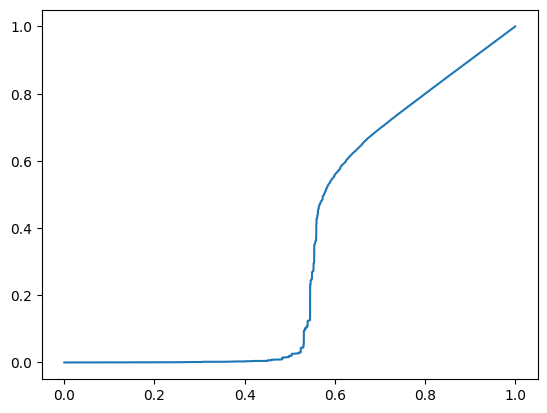

In [ ]:
plt.plot(xlist,big_list)